# Demonstrate `build_mermaid` for agent diagrams

The goal of this notebook is to demonstrate how to visualize various agents through `google-adk` and Mermaid, a diagramming tool.

In [1]:
from IPython.display import Image, display
from manugen_ai.utils import build_mermaid
import os

from google.adk.agents import Agent, LoopAgent, SequentialAgent, ParallelAgent, LlmAgent
from google.adk.tools import FunctionTool

In [2]:
agent1 = Agent(
    model="nonexistent-model",
    name="agent1",
    description=("Example"),
    instruction="""
Example
""",
)

agent2 = Agent(
    model="nonexistent-model",
    name="agent2",
    description=("Example"),
    instruction="""
Example
""",
)

agent3 = Agent(
    model="nonexistent-model",
    name="agent3",
    description=("Example"),
    instruction=f"""
Example
""",
)

agent4 = Agent(
    model="nonexistent-model",
    name="agent4",
    description=("Example"),
    instruction=f"""
Example
""",
)

agent5 = Agent(
    model="nonexistent-model",
    name="agent5",
    description=("Example"),
    instruction=f"""
Example
""",
)

agent6 = Agent(
    model="nonexistent-model",
    name="agent6",
    description=("Example"),
    instruction=f"""
Example
""",
)

agent7 = Agent(
    model="nonexistent-model",
    name="agent7",
    description=("Example"),
    instruction=f"""
Example
""",
)

# example sequence
sequence_1 = SequentialAgent(
    name="ExampleSequence",
    sub_agents=[agent1, agent2],
)

# example loop
loop_1 = LoopAgent(
    name="ExampleLoop",
    sub_agents=[agent6, agent7],
    max_iterations=10,
)

# example parallel
parallel_1 = ParallelAgent(
    name="ExampleParallel",
    sub_agents=[agent3, agent4, agent5],
)

# sequence for orchestrating everything together
root_agent = SequentialAgent(
    name="root_agent",
    sub_agents=[sequence_1, loop_1, parallel_1],
    description="Example",
)

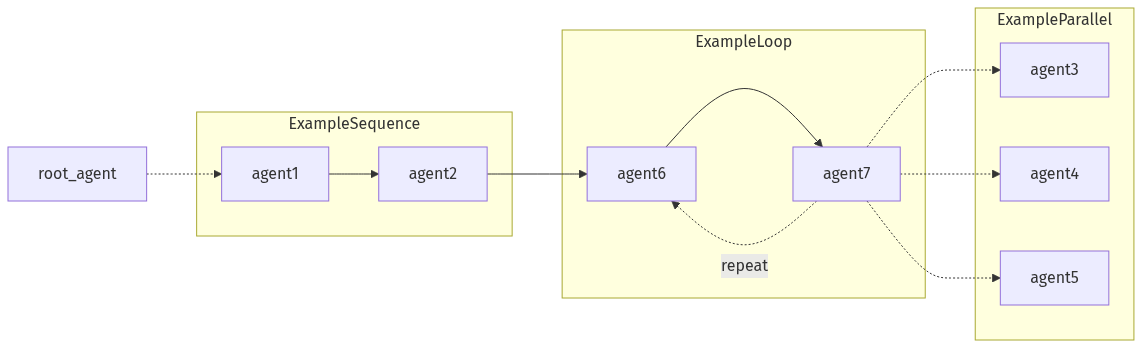

In [3]:
# show our loop as a mermaid diagram
_, PNG = build_mermaid(root_agent)
display(Image(PNG))

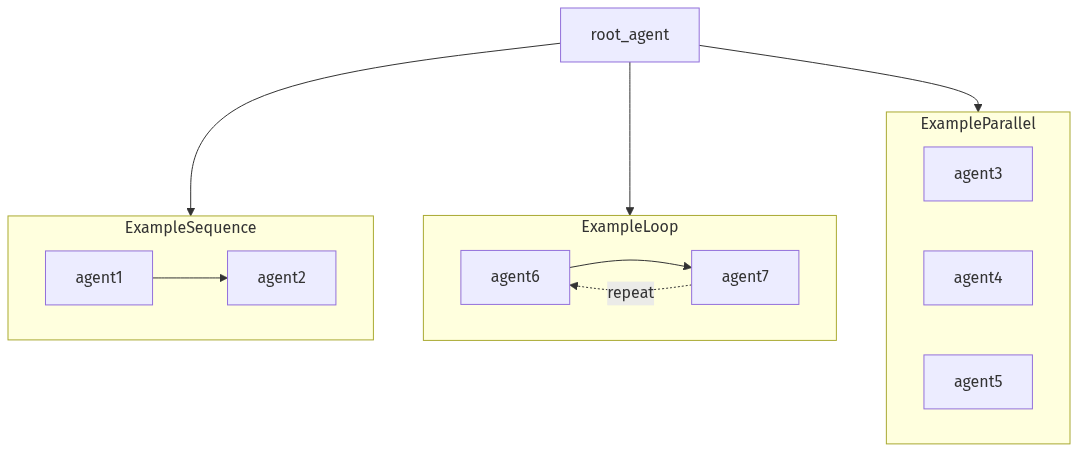

In [4]:
# demonstrate with llmagent and several sub-agents
sequence_1.parent_agent = None
loop_1.parent_agent = None
parallel_1.parent_agent = None
root_agent = LlmAgent(
    name="root_agent",
    sub_agents=[sequence_1, loop_1, parallel_1],
    description="Example",
)
# show our loop as a mermaid diagram
_, PNG = build_mermaid(root_agent, orientation="TB")
display(Image(PNG))